In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(font_scale=1.5)

from matplotlib.colors import LogNorm

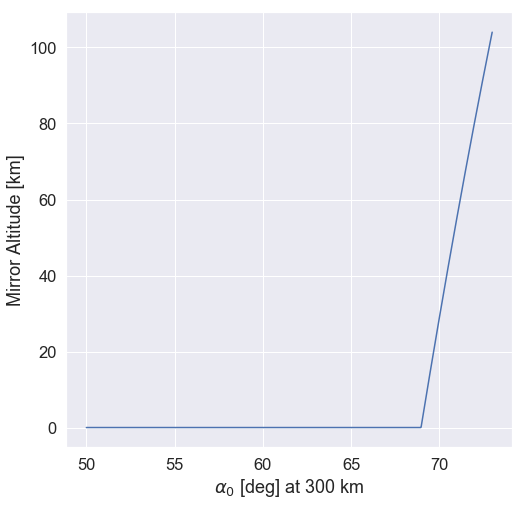

In [2]:

alpha = np.deg2rad(np.linspace(50, 73, 1000))

h_mirror = lambda alpha: (6378 + 300) * (np.sin(alpha))**(2/3) - 6378

h = h_mirror(alpha)

h[h < 0] = 0

plt.figure(figsize=(8,8));
plt.plot(np.rad2deg(alpha), h);
#plt.ylim(0, 100);
plt.xlabel(r'$\alpha_0$ [deg] at 300 km')
plt.ylabel('Mirror Altitude [km]');

In [3]:
data = pd.read_csv("../build/part_traj0.txt", names=['x','y','z','E'])
data2 = pd.read_csv("../build/part_traj30.txt", names=['x','y','z','E'])
data3 = pd.read_csv("../build/part_traj50.txt", names=['x','y','z','E'])
data4 = pd.read_csv("../build/part_traj72.txt", names=['x','y','z','E'])

data.info()
data2.info()
data3.info()

data.z += 500 * 1e3
data.x /= 1e3
data.y /= 1e3
data.z /= 1e3

data2.z += 500 * 1e3
data2.x /= 1e3
data2.y /= 1e3
data2.z /= 1e3

data3.z += 500 * 1e3
data3.x /= 1e3
data3.y /= 1e3
data3.z /= 1e3

data4.z += 500 * 1e3
data4.x /= 1e3
data4.y /= 1e3
data4.z /= 1e3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33708 entries, 0 to 33707
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       33708 non-null  float64
 1   y       33708 non-null  float64
 2   z       33708 non-null  float64
 3   E       33708 non-null  float64
dtypes: float64(4)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31516 entries, 0 to 31515
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       31516 non-null  float64
 1   y       31516 non-null  float64
 2   z       31516 non-null  int64  
 3   E       31516 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 985.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85926 entries, 0 to 85925
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       85926 non-null  float64
 1   y       85926 non-null  

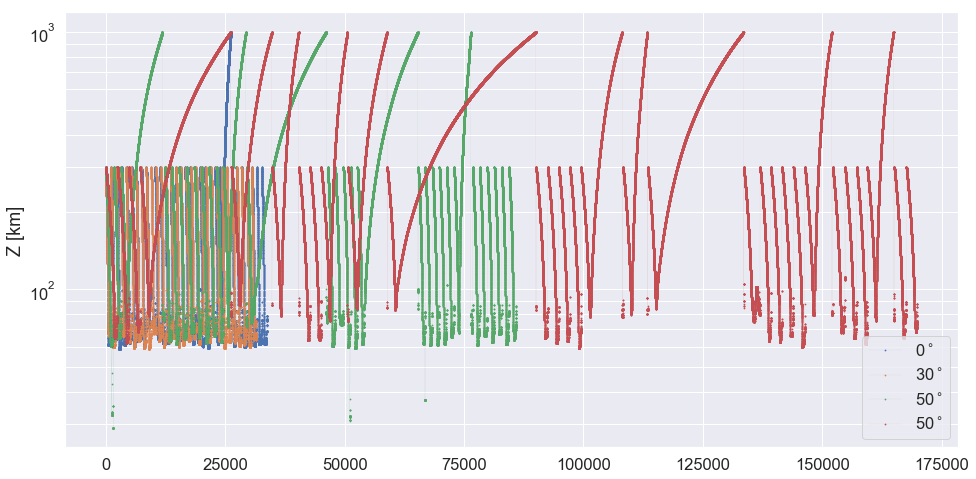

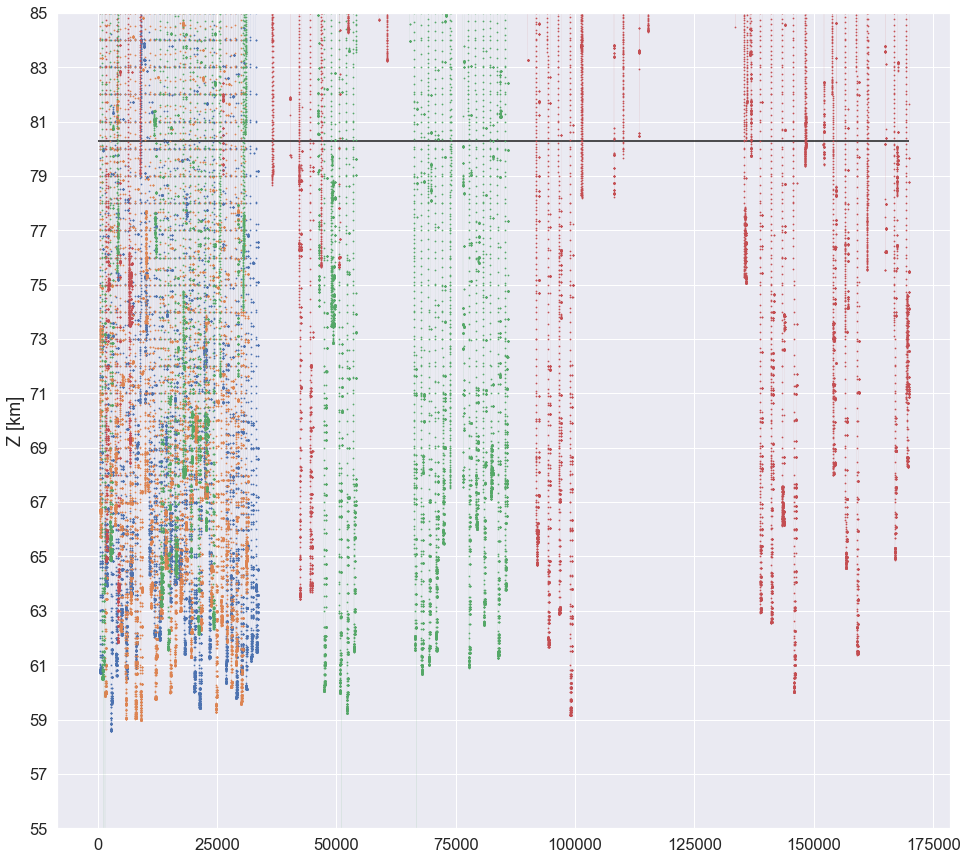

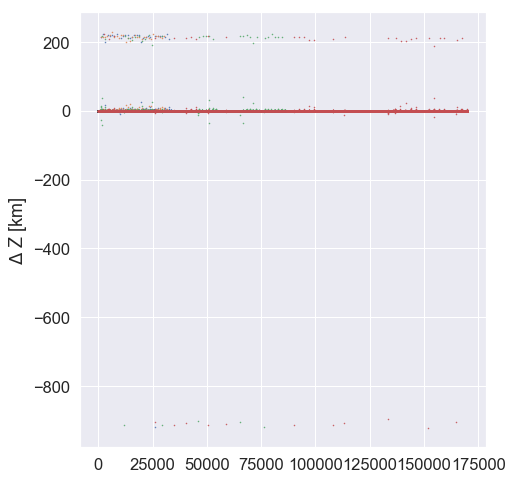

In [4]:
plt.figure(figsize=(16,8)); #plt.subplot(1,2,1); 
plt.grid(True, which='both')
plt.plot(data.z, '.-', markersize=1.5, linewidth=0.05, label='0$^\circ$');
plt.plot(data2.z, '.-', markersize=1.5, linewidth=0.05, label='30$^\circ$');
plt.plot(data3.z, '.-', markersize=1.5, linewidth=0.05, label='50$^\circ$');
plt.plot(data4.z, '.-', markersize=1.5, linewidth=0.05, label='50$^\circ$');

plt.ylabel('Z [km]');
plt.yscale('log');
plt.legend()


plt.figure(figsize=(16,15)); #plt.subplot(1,2,1); 
plt.grid(True, which='both')
plt.plot(data.z, '.-', markersize=1.5, linewidth=0.05);
plt.plot(data2.z, '.-', markersize=1.5, linewidth=0.05);
plt.plot(data3.z, '.-', markersize=1.5, linewidth=0.05);
plt.plot(data4.z, '.-', markersize=1.5, linewidth=0.05);

plt.ylabel('Z [km]');
#plt.yscale('log');
plt.ylim(np.min(data.z)-1, 0.8e2)
plt.yticks(np.linspace(5.5e1, 0.85e2, 16))

plt.hlines(h_mirror(np.deg2rad(72)), 0, len(data4))

'''
plt.subplot(1,2,2);
plt.hist2d(data.x, data.y, bins=50, norm=LogNorm());
plt.colorbar();
plt.xlabel('X [km]');
plt.ylabel('Y [km]');
''';

plt.figure(figsize=(16,8)); plt.subplot(1,2,1);
plt.plot(np.diff(data.z), '.', markersize=1);
plt.plot(np.diff(data2.z), '.', markersize=1);
plt.plot(np.diff(data3.z), '.', markersize=1);
plt.plot(np.diff(data4.z), '.', markersize=1);

plt.ylabel('$\Delta$ Z [km]');

/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/grant/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


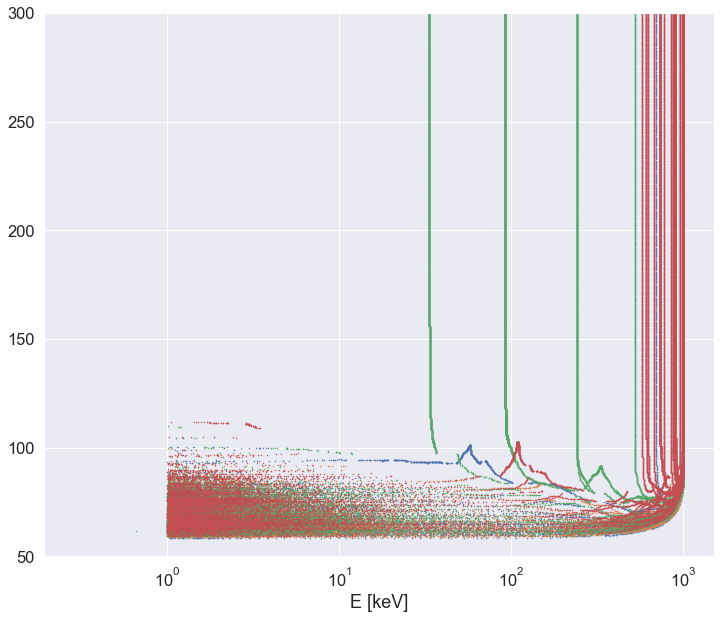

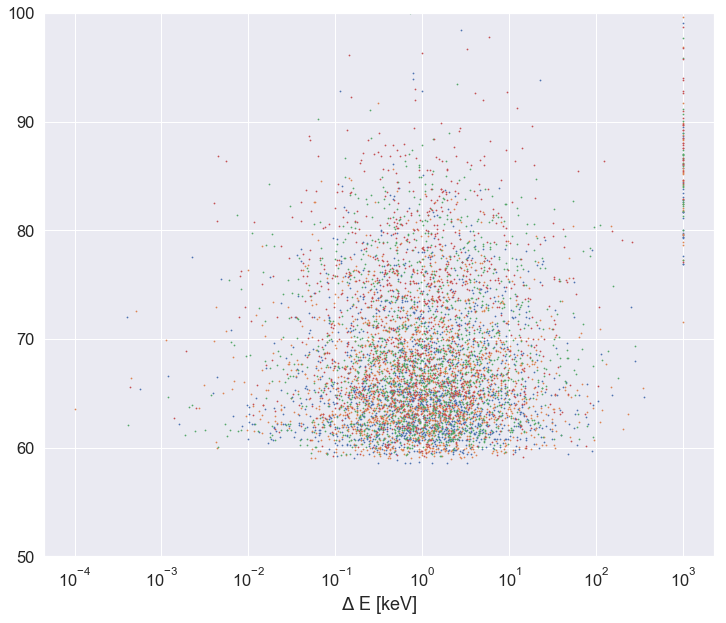

In [5]:
plt.figure(figsize=(12,10))
plt.plot(data.E, data.z, '.', markersize=1);
plt.plot(data2.E, data2.z, '.', markersize=1);
plt.plot(data3.E, data3.z, '.', markersize=1);
plt.plot(data4.E, data4.z, '.', markersize=1);

plt.ylim(50, 300);
plt.xscale('log')
plt.xlabel('E [keV]')

plt.figure(figsize=(12,10))
plt.plot(np.diff(data.E), data.z[:-1], '.', markersize=1.5);
plt.plot(np.diff(data2.E), data2.z[:-1], '.', markersize=1.5);
plt.plot(np.diff(data3.E), data3.z[:-1], '.', markersize=1.5);
plt.plot(np.diff(data4.E), data4.z[:-1], '.', markersize=1.5);

plt.ylim(50, 100);
plt.xscale('log')
plt.xlabel('$\Delta$ E [keV]');

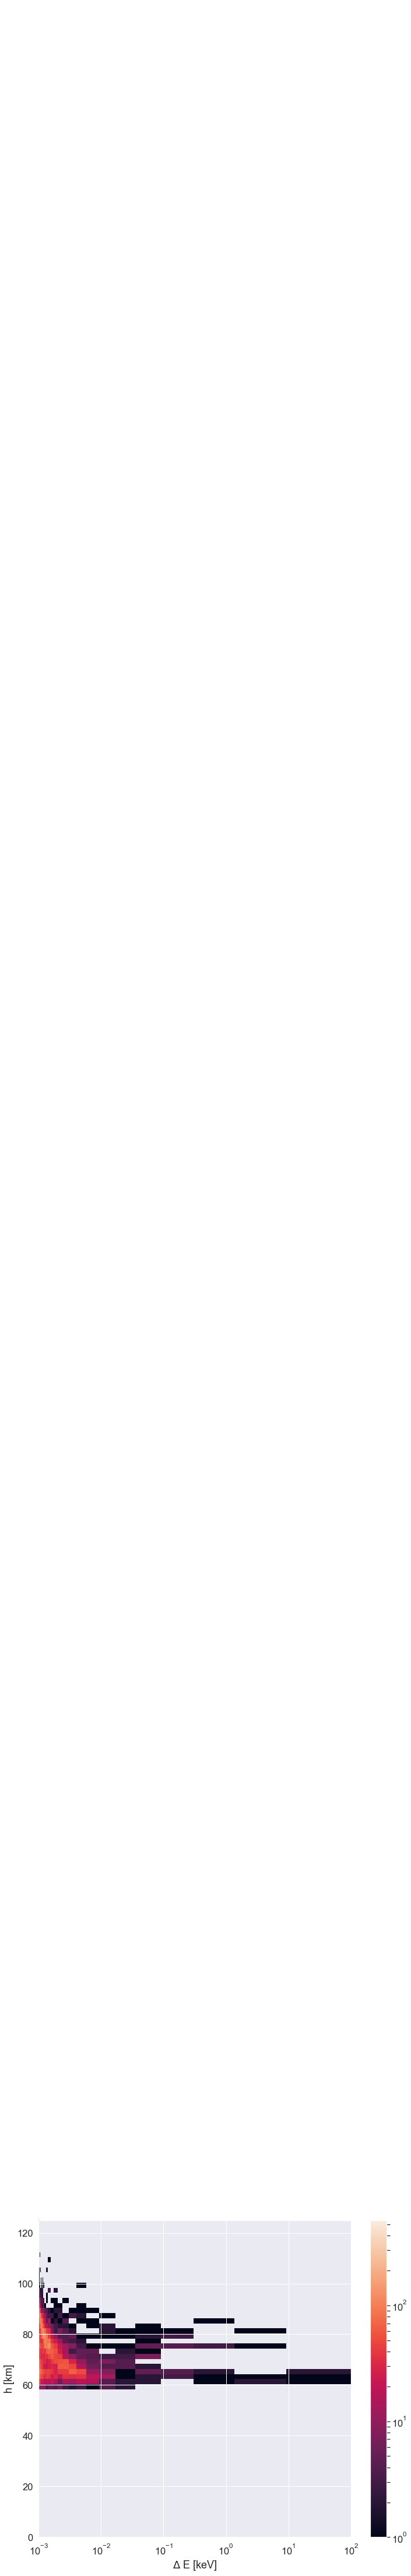

In [33]:
'''
print("%.3e , %.3e, %.3e, %.3e" % (np.sum(data.E), np.sum(data2.E), np.sum(data3.E), np.sum(data4.E)))
print("%.3e , %.3e, %.3e, %.3e" % (-np.sum(np.diff(data.E)), 
                                   -np.sum(np.diff(data2.E)), 
                                   -np.sum(np.diff(data3.E)), 
                                   -np.sum(np.diff(data4.E))))
''';

plt.figure(figsize=(12,10))
plt.hist2d(np.abs(np.diff(data4.E)), data4.z[:-1], 
           bins=[np.logspace(-3, 2), np.linspace(0,999, 500)], norm=LogNorm());
plt.colorbar();
plt.xscale('log')
plt.xlabel('$\Delta$ E [keV]');
plt.ylabel('h [km]');
plt.ylim([0, 125]);